In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

%matplotlib inline

In [2]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

labels = ["WDBC-Malignant", "WDBC-Benign"]

df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [4]:
# Normalize data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Visualization

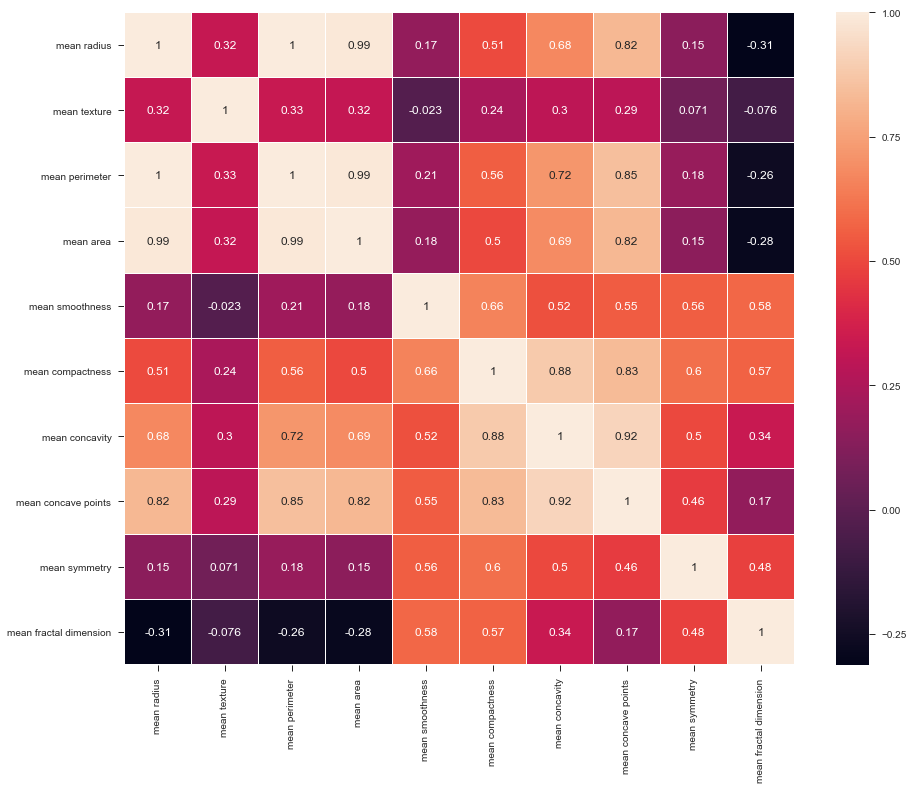

In [5]:
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(15, 12))

sns.heatmap(df.loc[:,:'mean fractal dimension'].corr(), linewidths=0.1, annot=True,)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


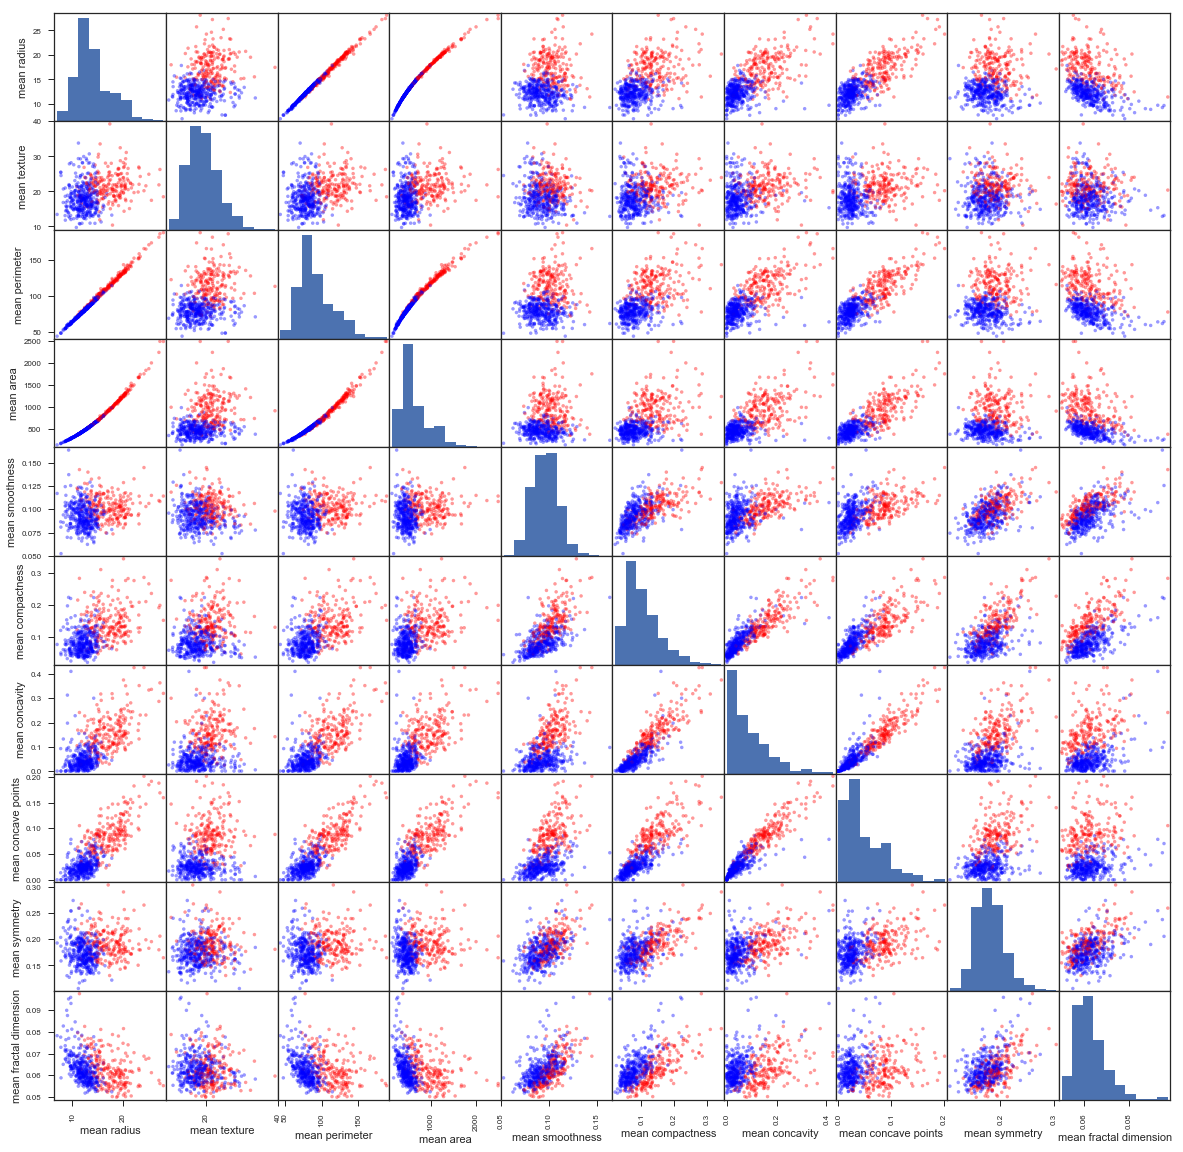

In [6]:
pd.scatter_matrix(df.loc[:,:'mean fractal dimension'], alpha=0.4, figsize=((20, 20)), c=list(map(lambda n: {0: 'red', 1: 'blue'}[n], y)))
plt.show()

## Using Decision Tree Classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [8]:
print(confusion_matrix(y_test, y_pred))

[[ 56   5]
 [  7 103]]


In [9]:
print(classification_report(y_test, y_pred=y_pred, target_names=labels))

                precision    recall  f1-score   support

WDBC-Malignant       0.89      0.92      0.90        61
   WDBC-Benign       0.95      0.94      0.94       110

   avg / total       0.93      0.93      0.93       171



## Using Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [11]:
print(confusion_matrix(y_test, y_pred))

[[ 59   2]
 [  1 109]]


In [12]:
print(classification_report(y_test, y_pred, target_names=labels))

                precision    recall  f1-score   support

WDBC-Malignant       0.98      0.97      0.98        61
   WDBC-Benign       0.98      0.99      0.99       110

   avg / total       0.98      0.98      0.98       171



## Using Support Vector Machine

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Using rbf kernel
param_grid = {
    'C': [1e1, 1e2, 1e3, 1e4, 1e5, 1e6],
    'gamma': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
}

clf = GridSearchCV(SVC(random_state=0), param_grid)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
clf.best_estimator_

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
print(confusion_matrix(y_test, y_pred))

[[ 59   2]
 [  1 109]]


In [15]:
print(classification_report(y_test, y_pred, target_names=labels))

                precision    recall  f1-score   support

WDBC-Malignant       0.98      0.97      0.98        61
   WDBC-Benign       0.98      0.99      0.99       110

   avg / total       0.98      0.98      0.98       171



## Using Multi-Layer Perceptron Classifier (Neural Network)

In [16]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 30), random_state=0)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 10, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [17]:
y_pred = mlp.predict(X_test)

In [18]:
print(confusion_matrix(y_test, y_pred))

[[ 59   2]
 [  0 110]]


In [19]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98        61
          1       0.98      1.00      0.99       110

avg / total       0.99      0.99      0.99       171

